# Quickstart

Xenopict is a python library for depicting molecules.


## Installation

Xenopict installs from pypi.

```console
pip install xenopict
```

The package is only tested on Python 3.10 and 3.9. It may run on earlier versions of python, but we do not intend to maintain compatibility.


## Reading in a Molecule

The main entrypoint to xenopict is the Xenopict class, which is initialized with a small molecule. The class can take a SMILES String

In [ ]:
from xenopict import Xenopict     
mol = Xenopict('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

It can also be initialized with a RDKit mol.

In [ ]:
from rdkit import Chem
mol = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
diclofenac = mol = Xenopict(mol)

Now that a molecule is loaded, we can display it easily in a notebook.

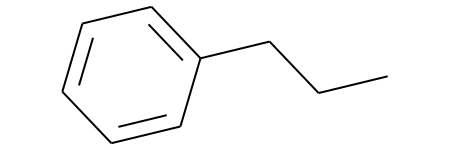

In [17]:
from xenopict import magic # the magic package enables several integrations with notebooks
mol

## Atom and Bond Shading

Xenopict can shade molecules by with an intensity, which can range from -1 to 1. This shading is percepually uniform, implemented in concise vector graphics. Xenosite produces an SVG, which can be accessed with the 'to_svg' method.

To demonstrate, we will shade a molecule by its partial charge, which we compute from the RDKit library. Each atom is assigned a number in a vector.

In [ ]:
import rdkit.Chem.rdPartialCharges
import numpy as np
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol.mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])
shading

The shading is applied to molecule using the "shade" method. The "halo" method adds a halo effect that aids visibility. 

In [ ]:
Xenopict(mol).shade(shading).halo()


We can shade molecules by bond too. To demonstrate, we will create a shading vector for bonds that is the average charge of the atom at each end.

In [ ]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2
bshading

In [ ]:
Xenopict(mol).shade(bond_shading=(a1, a2, bshading)).halo()

Atoms and bonds can be shaded together at the same time.

In [ ]:
x = Xenopict(mol).shade(shading, bond_shading=(a1, a2, bshading)).halo()
x

## Marking, Shading and Focusing Substructures

At times we want to mark a substructure. We can do so by supplying a list of atom idxs.

In [ ]:
x.mark_substructure([0,1,2,3])

We can also shade substructures, by specifying them as lists of IDs, wiht a list of shading values. Substructures with intensities closer to zero are painted behind those with higher intensities. 

In [ ]:
substr1 = [0,1,2,3]
substr2 = [7,8,9,10]
substr3 = [3,4,5,9]

shading = [1, -0.65, 0.6]

Xenopict(mol).shade_substructure([substr1, substr2, substr3], shading)



By default, xenopict adds in all the bonds joining a group of atoms. But sometimes this includes
bonds that were not wanted. Substructures can be more precisely specified by including a list of bonds. 

In [ ]:
mol = Chem.MolFromSmiles("c1ccccc1CCC")

atoms = [0,1,2,3,4,5]
bonds = [[0,1], [2,1], [2,3], [3,4],[4, 5], [5,6]]

Xenopict(mol).shade_substructure([atoms], [-0.8]), \
Xenopict(mol).shade_substructure([atoms], [0.8], [bonds])


Alongside shadings or alternately to them, we can also depict a substructure in isolation.

In [ ]:
Xenopict(mol).substructure_focus(atoms), \
Xenopict(mol).substructure_focus(atoms, bonds)

## Adding Atom Indices

Molecules can be drawn with indices too.

In [ ]:
x = Xenopict(mol,scale=30,  add_atom_indices=True)
x


Atom IDs are carried over to substructure depictions, but they are not filtered out yet.

In [ ]:
x.substructure_focus([4,5,6])